In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-predictionused-cars/car data.csv


# ✅ TASK 3: Car Price Prediction with Machine Learning
● Collect car-related features like brand goodwill, horsepower, mileage, etc.  
● Train a regression model to predict car prices based on these features.  
● Handle data preprocessing, feature engineering, and model evaluation.  
● Use Python libraries like Pandas, Scikit-learn and Matplotlib for the workflow.  
● Understand real-world applications of machine learning in price prediction.  

# 1. Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import Dataset

In [3]:
import os
os.listdir("/kaggle/input/car-price-predictionused-cars")


['car data.csv']

In [4]:
# Loading the Dataset
df = pd.read_csv("/kaggle/input/car-price-predictionused-cars/car data.csv")

# 3. EDA(Exploratory Data Analysis

# Data Overview

In [5]:
# Displays first n rows (default 5)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#Displays last n rows (default 5)
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [7]:
#Returns (rows, columns) 
df.shape

(301, 9)

In [8]:
#Displays column data types & memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.columns
#Lists all column names

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
 df.index
#Displays index range

RangeIndex(start=0, stop=301, step=1)

In [11]:
df.dtypes
#Shows data types of each column

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [12]:
df.describe()
#Summary statistics for numerical columns

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
df.describe(include="all") 
#Summary statistics for all columns

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


# Checking Missing Values

In [14]:
df.isnull().sum()
#Counts missing values in each column

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [15]:
df.isna().sum()
#Same as isnull()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [16]:
df[df.duplicated()] 
#Displays duplicate rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [17]:
df.drop_duplicates()
#Removes duplicate rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Summary Statistics

In [18]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [19]:
 df.nunique()
#Number of unique values per column

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

# Value Counts & Distributions

In [20]:
df.columns.value_counts()
#Count soccurrences of each unique value

Car_Name         1
Year             1
Selling_Price    1
Present_Price    1
Driven_kms       1
Fuel_Type        1
Selling_type     1
Transmission     1
Owner            1
Name: count, dtype: int64

In [21]:
df.columns.value_counts(normalize=True)
#Normalized value counts (percentage)

Car_Name         0.111111
Year             0.111111
Selling_Price    0.111111
Present_Price    0.111111
Driven_kms       0.111111
Fuel_Type        0.111111
Selling_type     0.111111
Transmission     0.111111
Owner            0.111111
Name: proportion, dtype: float64

# Data Visualization (Quick Plots)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Driven_kms'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

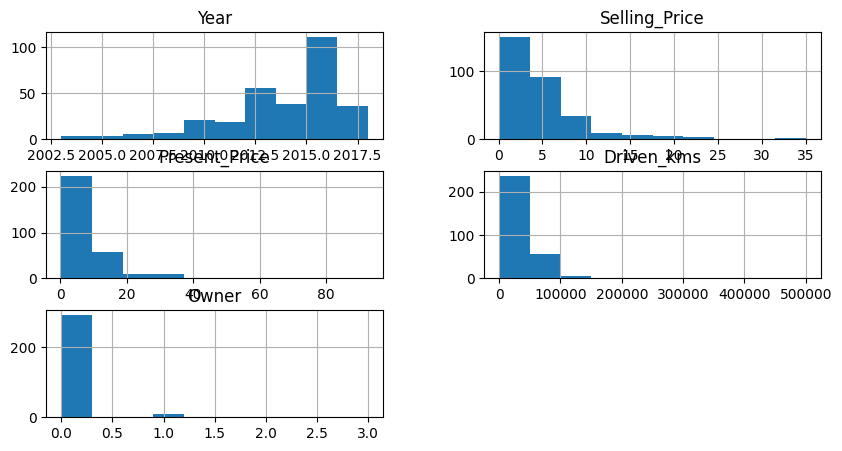

In [22]:
df.hist(figsize=(10, 5))
#Histogram for numerical columns

<Axes: >

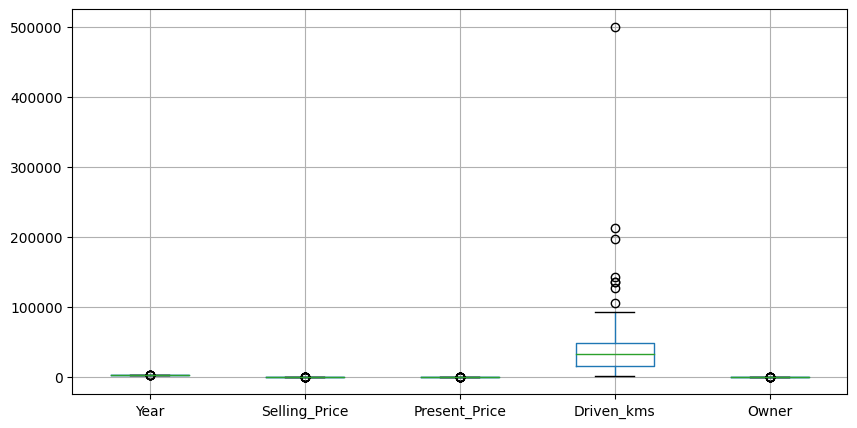

In [23]:
df.boxplot(figsize=(10, 5))
#Box plot for outlier detection 

<Axes: ylabel='Frequency'>

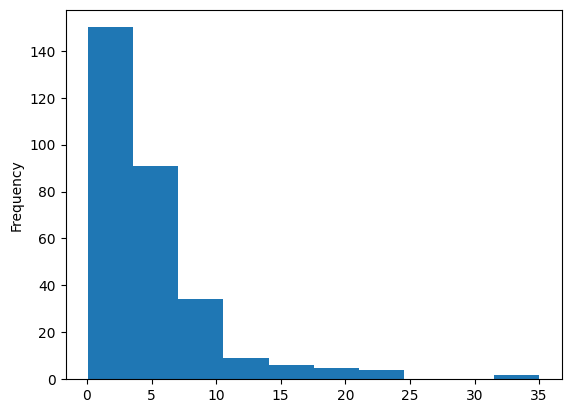

In [24]:
df["Selling_Price"].plot(kind="hist")
#Histogram for a single column

<Axes: ylabel='Frequency'>

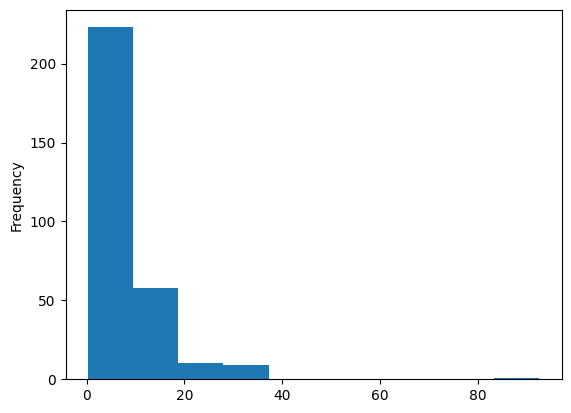

In [25]:
df["Present_Price"].plot(kind="hist")
#Histogram for a single column

<Axes: ylabel='Frequency'>

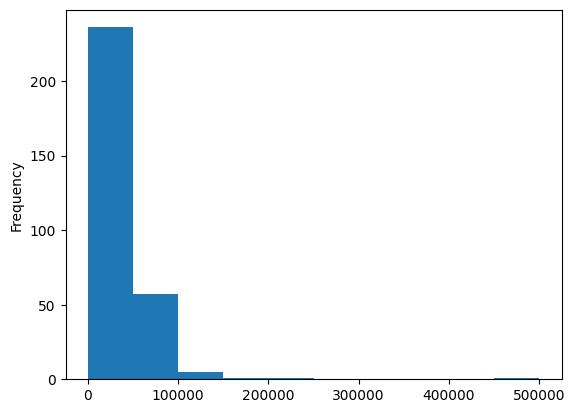

In [26]:
df["Driven_kms"].plot(kind="hist")
#Histogram for a single column

<Axes: >

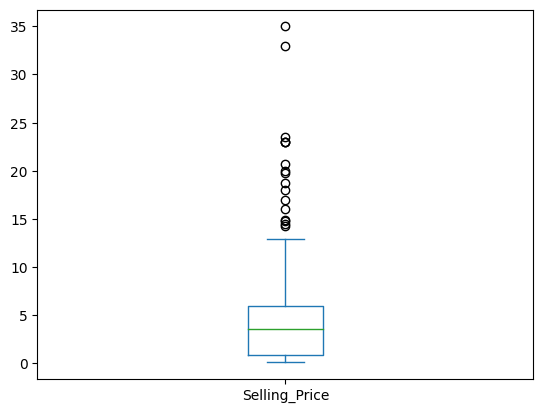

In [27]:
df["Selling_Price"].plot(kind="box")
#Box plot for a single column

<Axes: >

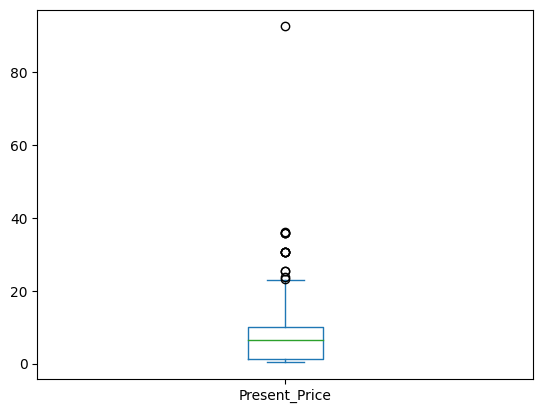

In [28]:
df["Present_Price"].plot(kind="box")
#Box plot for a single column

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

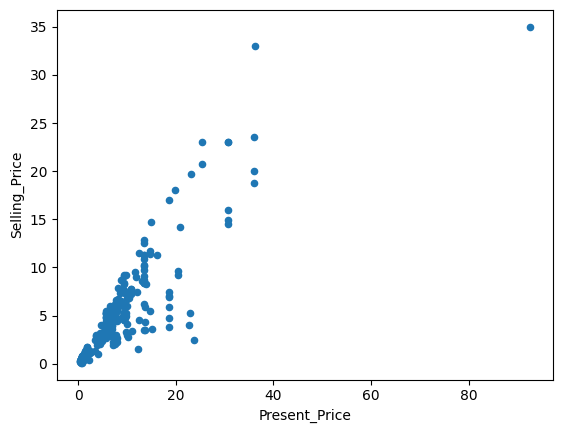

In [29]:
df.plot(kind="scatter", x="Present_Price", y="Selling_Price")
#Scatter plot

# 4. Data Preprocessing

In [30]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [31]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Normalize and Scale the Data

In [32]:
# This scales the values to have mean = 0 and standard deviation = 1 to better distribution
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply Min_Max Scaling to Age and salary
df[['Selling_Price','Present_Price','Driven_kms']] = scaler.fit_transform(df[['Selling_Price','Present_Price','Driven_kms']])

# Show scaled data
df[['Selling_Price','Present_Price','Driven_kms']].head()

,Selling_Price,Present_Price,Driven_kms
0,-0.258416,-0.236256,-0.256224
1,0.017481,0.221544,0.155911
2,0.510154,0.257472,-0.773969
3,-0.356950,-0.403151,-0.817758
4,-0.012079,-0.087906,0.141743


# Scaling

In [33]:
# This scales the values to have mean = 0 and standard deviation = 1 to better distribution
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply Min_Max Scaling to Age and salary
df[['Selling_Price','Present_Price','Driven_kms']] = scaler.fit_transform(df[['Selling_Price','Present_Price','Driven_kms']])

# Show scaled data
df[['Selling_Price','Present_Price','Driven_kms']].head()

,Selling_Price,Present_Price,Driven_kms
0,-0.258416,-0.236256,-0.256224
1,0.017481,0.221544,0.155911
2,0.510154,0.257472,-0.773969
3,-0.356950,-0.403151,-0.817758
4,-0.012079,-0.087906,0.141743


# 5. Feature Engineering

# Convert "Year" to "Car_Age"

In [34]:
df['Car_Age'] = 2025 - df["Year"]
df.drop('Year', axis=1, inplace=True)

# Drop "Car_Name" or Use it Smartly

In [35]:
df['Brand'] = df['Car_Name'].apply(lambda x: x.split()[0])  # Only brand name
df.drop('Car_Name', axis=1, inplace=True)


# Handle Categorical Variables

In [36]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Outlier Handling

In [37]:
Q1 = df['Driven_kms'].quantile(0.25)
Q3 = df['Driven_kms'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Driven_kms'] < (Q1 - 1.5 * IQR)) | (df['Driven_kms'] > (Q3 + 1.5 * IQR)))]


In [38]:
df = pd.get_dummies(df, columns=['Brand'], drop_first=True)

In [39]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Brand_Bajaj,...,Brand_land,Brand_omni,Brand_ritz,Brand_s,Brand_swift,Brand_sx4,Brand_verna,Brand_vitara,Brand_wagon,Brand_xcent
0,-0.258416,-0.236256,-0.256224,0,11,False,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,0.017481,0.221544,0.155911,0,12,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,0.510154,0.257472,-0.773969,0,8,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.356950,-0.403151,-0.817758,0,14,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,-0.012079,-0.087906,0.141743,0,11,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [40]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'Car_Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual', 'Brand_Bajaj', 'Brand_Hero', 'Brand_Honda',
       'Brand_Hyosung', 'Brand_KTM', 'Brand_Mahindra', 'Brand_Royal',
       'Brand_Suzuki', 'Brand_TVS', 'Brand_UM', 'Brand_Yamaha', 'Brand_alto',
       'Brand_amaze', 'Brand_baleno', 'Brand_brio', 'Brand_ciaz', 'Brand_city',
       'Brand_corolla', 'Brand_creta', 'Brand_dzire', 'Brand_elantra',
       'Brand_eon', 'Brand_ertiga', 'Brand_etios', 'Brand_fortuner',
       'Brand_grand', 'Brand_i10', 'Brand_i20', 'Brand_ignis', 'Brand_innova',
       'Brand_jazz', 'Brand_land', 'Brand_omni', 'Brand_ritz', 'Brand_s',
       'Brand_swift', 'Brand_sx4', 'Brand_verna', 'Brand_vitara',
       'Brand_wagon', 'Brand_xcent'],
      dtype='object')

# 6. Model Training

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data

In [42]:
# Defining X and y
X = df[['Selling_Price', 'Driven_kms', 'Owner', 'Car_Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual', 'Brand_Bajaj', 'Brand_Hero', 'Brand_Honda',
       'Brand_Hyosung', 'Brand_KTM', 'Brand_Mahindra', 'Brand_Royal',
       'Brand_Suzuki', 'Brand_TVS', 'Brand_UM', 'Brand_Yamaha', 'Brand_alto',
       'Brand_amaze', 'Brand_baleno', 'Brand_brio', 'Brand_ciaz', 'Brand_city',
       'Brand_corolla', 'Brand_creta', 'Brand_dzire', 'Brand_elantra',
       'Brand_eon', 'Brand_ertiga', 'Brand_etios', 'Brand_fortuner',
       'Brand_grand', 'Brand_i10', 'Brand_i20', 'Brand_ignis', 'Brand_innova',
       'Brand_jazz', 'Brand_land', 'Brand_omni', 'Brand_ritz', 'Brand_s',
       'Brand_swift', 'Brand_sx4', 'Brand_verna', 'Brand_vitara',
       'Brand_wagon', 'Brand_xcent']]
y = df["Present_Price"]

# Define features (X) and target (Y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model

In [44]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train , y_train)
# Predict on test data
Y_pred = model.predict(X_test)

# Evaluate Model’s Performance

In [45]:
print("MSE: ",mean_squared_error(y_test, Y_pred))
print("r2_score: ",r2_score(y_test, Y_pred))

MSE:  0.05821820335673935
r2_score:  0.9478857581441834
